## Satellite Image Classification

data: https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

In [46]:
import cv2
import matplotlib.pyplot as plt

In [47]:
dir = 'dataset/train'
image_shape = [84, 84]

In [48]:
image = cv2.imread(dir+'/cloudy/train_4127.jpg')

In [49]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

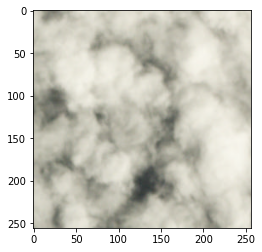

In [50]:
plt.imshow(image)
plt.show();

In [51]:
image.shape

(256, 256, 3)

# Generating training and validation

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
valid_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

In [54]:
training_data = train_gen.flow_from_directory(
    dir, 
    class_mode="categorical",
    target_size=image_shape, 
    batch_size=32,
    subset="training", 
    seed=50
)

Found 3934 images belonging to 4 classes.


In [55]:
validation_data = valid_gen.flow_from_directory(
    dir, 
    class_mode="categorical",
    target_size=image_shape, 
    batch_size=32,
    subset="validation", 
    seed=50
)

Found 1685 images belonging to 4 classes.


In [56]:
print(training_data.class_indices)

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


In [57]:
classes = training_data.class_indices

In [58]:
def get_key(val, my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key

In [59]:
import numpy as np

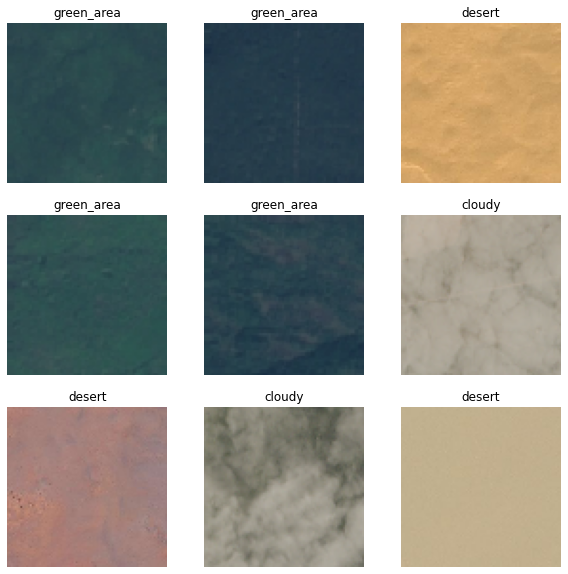

In [60]:
plt.figure(figsize=(10, 10))

for images, labels in next(zip(training_data)):
    # print(images[0].shape)
    # print(labels[i])
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(get_key(np.argmax(labels[i]), classes))
        plt.axis("off")
    plt.show()

# Building the model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [64]:
model = Sequential([
    layers.Conv2D(34, (3, 3), activation="relu", padding="same", input_shape=image_shape + [3]),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation="relu", padding="valid"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(200, activation="relu"),
    layers.Dense(4, activation="softmax")
])

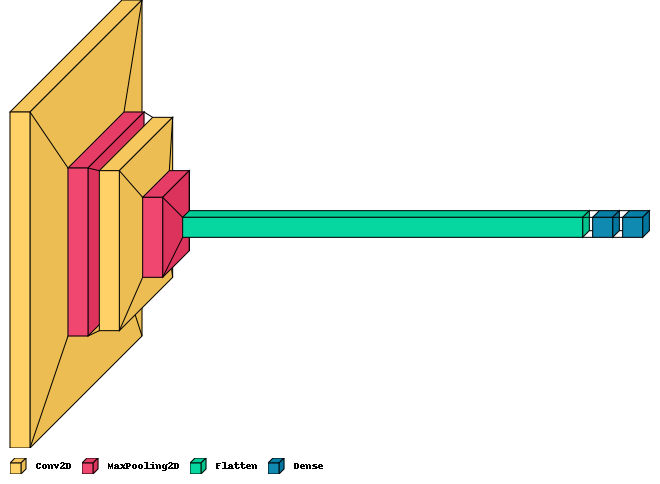

In [65]:
import visualkeras
visualkeras.layered_view(model, legend=True) 

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 84, 84, 34)        952       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 42, 42, 34)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 40, 40, 64)        19648     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 25600)             0         
                                                                 
 dense_15 (Dense)            (None, 200)              

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

# Training the model


In [68]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [69]:
history = model.fit(
    training_data,
    epochs=15,
    validation_data=validation_data,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/15
123/123 [==============================] - 48s 388ms/step - loss: 0.5051 - accuracy: 0.7605 - val_loss: 0.3873 - val_accuracy: 0.8617
Epoch 2/15
123/123 [==============================] - 45s 364ms/step - loss: 0.3400 - accuracy: 0.8582 - val_loss: 0.3090 - val_accuracy: 0.8807
Epoch 3/15
123/123 [==============================] - 52s 423ms/step - loss: 0.2914 - accuracy: 0.8800 - val_loss: 0.3050 - val_accuracy: 0.8682
Epoch 4/15
123/123 [==============================] - 55s 444ms/step - loss: 0.2620 - accuracy: 0.8991 - val_loss: 0.2446 - val_accuracy: 0.8807
Epoch 5/15
123/123 [==============================] - 54s 441ms/step - loss: 0.2480 - accuracy: 0.9067 - val_loss: 0.2594 - val_accuracy: 0.8973
Epoch 6/15
123/123 [==============================] - 51s 415ms/step - loss: 0.2344 - accuracy: 0.9021 - val_loss: 0.2349 - val_accuracy: 0.8878
Epoch 7/15
123/123 [==============================] - 46s 372ms/step - loss: 0.2402 - accuracy: 0.9057 - val_loss: 0.2425 - val_ac

# Plotting History

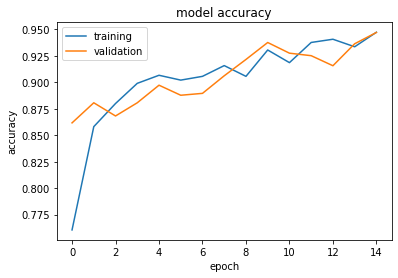

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

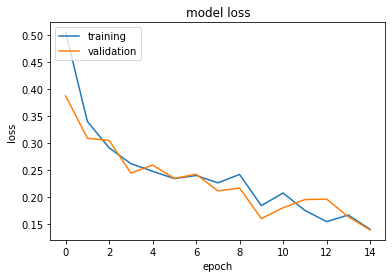

In [71]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# Evaluating the model

In [72]:
score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

53/53 [==============================] - 5s 88ms/step - loss: 0.1396 - accuracy: 0.9472
Test loss: 0.1395532190799713
Test accuracy: 0.947180986404419


# Prediction

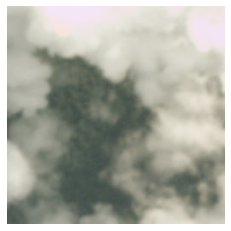

In [73]:
image = cv2.imread('dataset/test/train_413.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image/255
plt.imshow(image)
plt.axis("off")
plt.show()

In [75]:
resized_image_for_prediction = cv2.resize(image, 
                                          tuple(image_shape))
resized_image_for_prediction = np.expand_dims(resized_image_for_prediction, axis=0)
resized_image_for_prediction.shape

(1, 84, 84, 3)

In [77]:
pred = model.predict(resized_image_for_prediction)
print("Predict: " + get_key(np.argmax(pred), training_data.class_indices))

Predict: cloudy


In [78]:
print(pred)

[[9.8578924e-01 1.4210426e-02 2.3344084e-09 3.2999776e-07]]


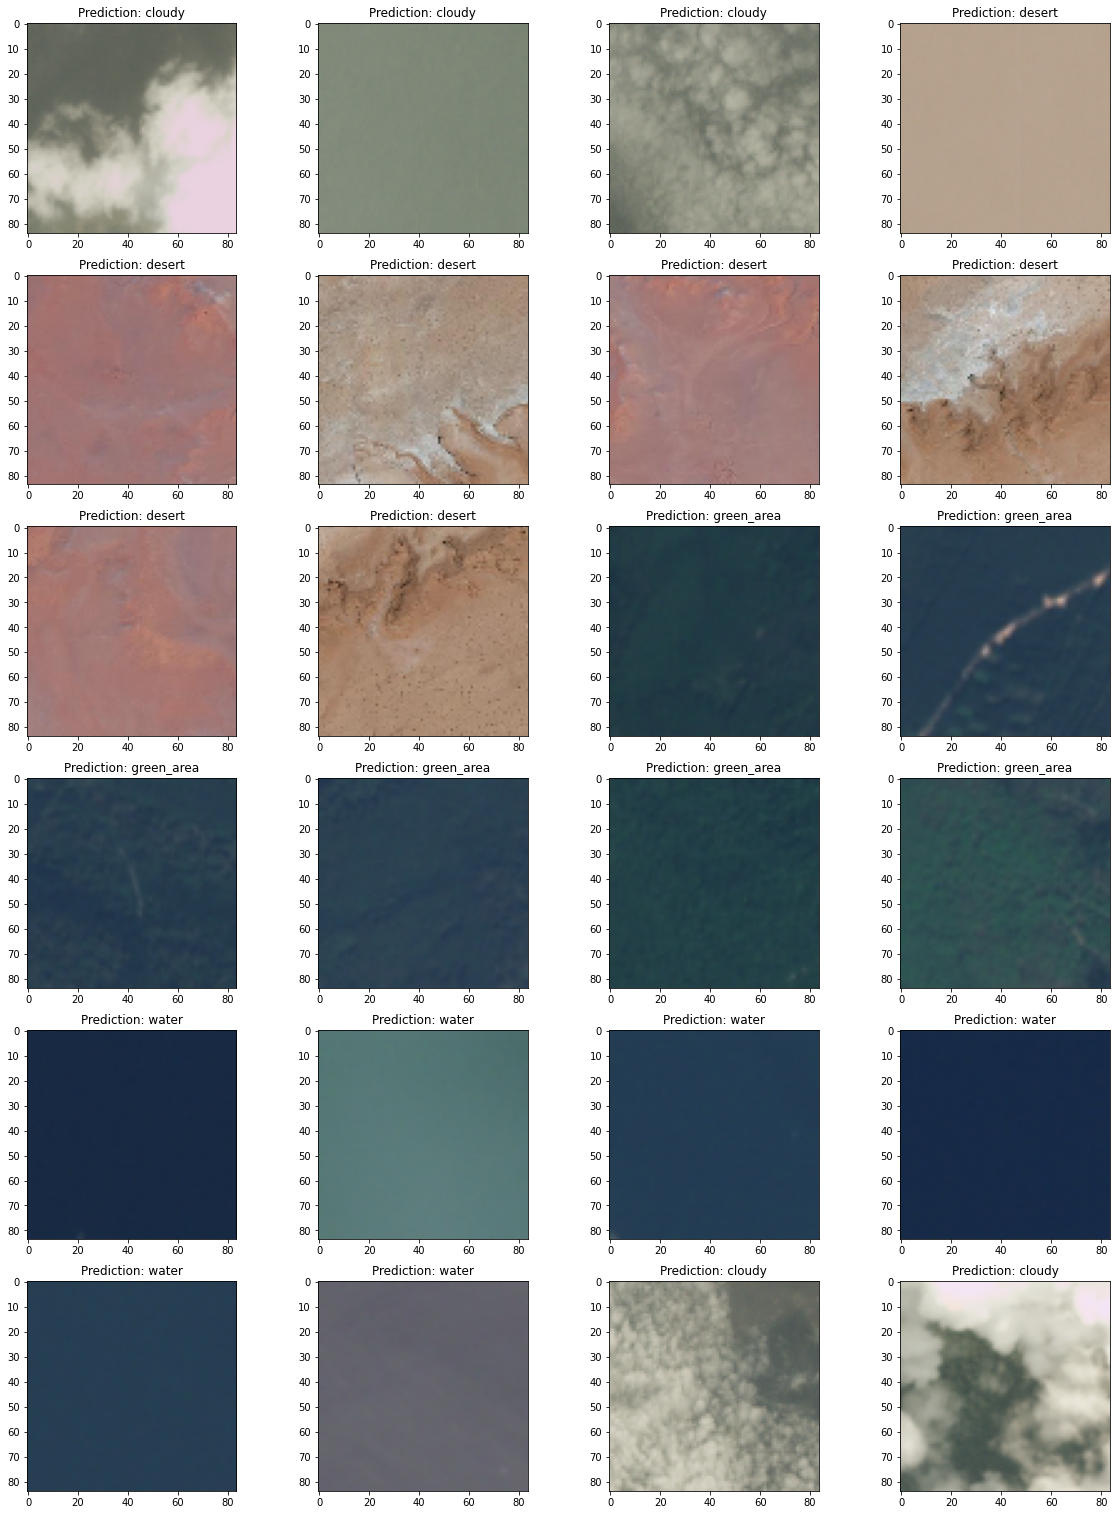

In [80]:
import os
i = 0
plt.figure(figsize=(20, 27))
for filename in os.listdir('dataset/test/'):
    img = cv2.imread(os.path.join('dataset/test/', filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, tuple(image_shape))
    img = img/255
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(img)
    img = np.expand_dims(img, axis = 0)
    pred = model.predict(img)
    output_class = get_key(np.argmax(pred), classes)
    plt.title("Prediction: " + output_class)
    i+=1
    
plt.show()